In [1]:
%pip install -r requirements.txt

^C
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import plotly.express as px
import plotly.graph_objects as go


In [36]:
directory = '../java/resources/results/'
all_cases_cloudlets = {}
all_cases_vms = {}

for filename in os.listdir(directory):
    
    base= os.path.basename(filename)
    name = os.path.splitext(base)[0]
    # print(i)
    
    aux_df = pd.read_csv(directory+filename+'/cloudlets_results.csv')
    aux_df.rename(columns={'Cloudlet ID':'task', 'Start Time':'start_time', 'Finish Time':'finish_time', 'Execution Time':'duration', 'VM ID':'vm'}, inplace=True)
    all_cases_cloudlets[name] = aux_df
    aux_vms = pd.read_csv(directory+filename+'/vms_results.csv')
    aux_vms.rename(columns={'VM ID':'vm', 'VM Load':'vm_load', 'Total Execution Time':'duration'}, inplace=True)
    all_cases_vms[name] = aux_vms
all_cases_cloudlets.keys()

dict_keys(['example1', 'scenario-0-1-25', 'scenario-0-1-5', 'scenario-0-15-200', 'scenario-0-2-5', 'scenario-0-20-500', 'scenario-1-1-50', 'scenario-10-6-25', 'scenario-11-6-50', 'scenario-12-6-100', 'scenario-13-6-150', 'scenario-14-6-200', 'scenario-15-9-25', 'scenario-16-9-50', 'scenario-17-9-100', 'scenario-18-9-150', 'scenario-19-9-200', 'scenario-2-1-100', 'scenario-20-15-25', 'scenario-21-15-50', 'scenario-22-15-100', 'scenario-23-15-150', 'scenario-24-15-200', 'scenario-3-1-150', 'scenario-4-1-200', 'scenario-5-3-25', 'scenario-6-3-50', 'scenario-7-3-100', 'scenario-8-3-150', 'scenario-9-3-200'])

In [37]:
scenario = 'scenario-24-15-200'
current_case = all_cases_cloudlets[scenario]
current_case_vms = all_cases_vms[scenario]

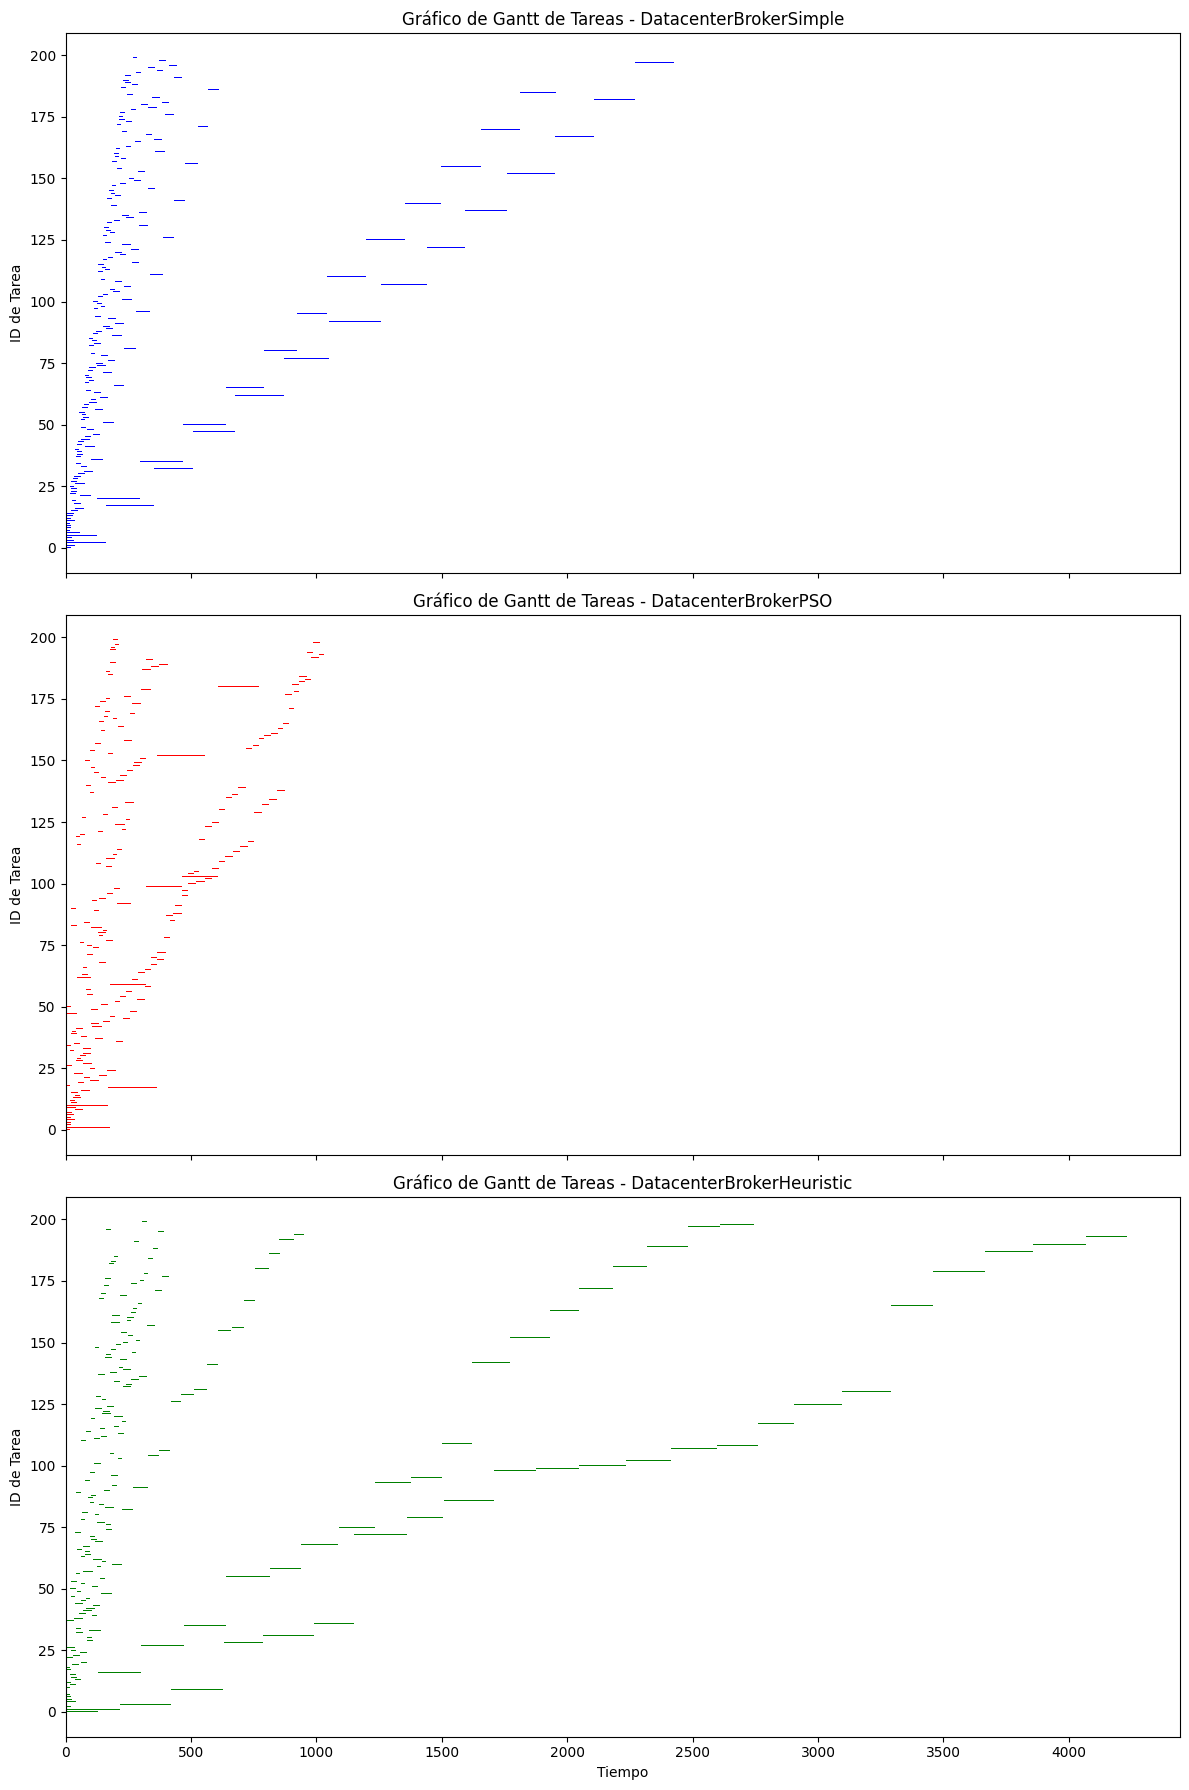

In [38]:
# Filtrar los datos por cada broker
brokers = current_case['Broker'].unique()
num_brokers = len(brokers)

# Crear subplots
fig, axs = plt.subplots(num_brokers, 1, figsize=(12, 6 * num_brokers), sharex=True)

# Si solo hay un broker, axs no será una lista, así que lo convertimos en una lista
if num_brokers == 1:
    axs = [axs]

# Crear un gráfico para cada broker
for ax, broker in zip(axs, brokers):
    broker_data = current_case[current_case['Broker'] == broker]
    for i, task in broker_data.iterrows():
        color_map = {
            'DatacenterBrokerSimple': 'blue',
            'DatacenterBrokerPSO': 'red',
            'DatacenterBrokerHeuristic': 'green'
        }
        ax.barh(y=task['task'], width=task['duration'], left=task['start_time'], height=0.4, color=color_map.get(task['Broker'], 'gray'))
    ax.set_ylabel('ID de Tarea')
    ax.set_title(f'Gráfico de Gantt de Tareas - {broker}')

# Configurar el eje x compartido
axs[-1].set_xlabel('Tiempo')

plt.tight_layout()
plt.show()

In [39]:
speedup (mejor maquina vs tiempo)


escalado de vm fijo tareas o tareas fijo vm

histplot triple tomando makespan y mismos casos
cpu utilization

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1484715972.py, line 1)

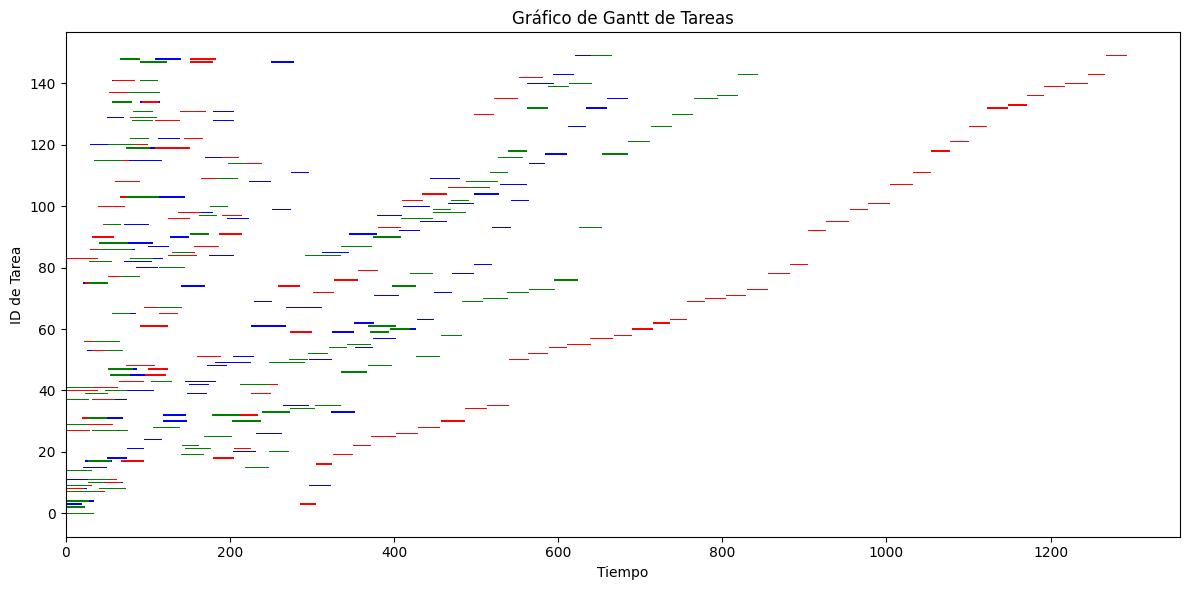

In [16]:
current_case = all_cases['scenario-8-3-150']
# Crear el gráfico de Gantt
fig, ax = plt.subplots(figsize=(12, 6))

for i, task in current_case.iterrows():
    color_map = {
      'DatacenterBrokerSimple': 'blue',
      'DatacenterBrokerPSO': 'red',
      'DatacenterBrokerHeuristic': 'green'
    }
    ax.barh(y=task['task'], width=task['duration'], left=task['start_time'], height=0.4, color=color_map.get(task['Broker'], 'gray'))

ax.set_xlabel('Tiempo')
ax.set_ylabel('ID de Tarea')
ax.set_title('Gráfico de Gantt de Tareas')
plt.tight_layout()
plt.show()


In [17]:
current_case = all_cases['scenario-8-3-150']

# Crear el gráfico de Gantt interactivo
fig = px.timeline(current_case, x_start="start_time", x_end="finish_time", y="task", color="Broker", title='Gráfico de Gantt de Tareas')
fig.update_layout(xaxis_type='linear')
# fig.update_yaxes(autorange="reversed")  # Opcional: invertir el orden de las tareas
fig.show()

In [5]:
# Check the first few rows of the data
print(current_case.head())

# Check column names and data types
print(current_case.columns)
print(current_case.dtypes)

                   Broker  task  vm  duration  start_time  finish_time  \
0  DatacenterBrokerSimple     3   0        20           0           20   
1  DatacenterBrokerSimple     2   2        24           0           24   
2  DatacenterBrokerSimple    14   2        26           0           26   
3  DatacenterBrokerSimple     8   2        26           0           26   
4  DatacenterBrokerSimple     0   0        29           0           29   

   CPU Utilization Start  CPU Utilization Finish  
0                      1                       1  
1                      1                       1  
2                      1                       1  
3                      1                       1  
4                      1                       1  
Index(['Broker', 'task', 'vm', 'duration', 'start_time', 'finish_time',
       'CPU Utilization Start', 'CPU Utilization Finish'],
      dtype='object')
Broker                    object
task                       int64
vm                         int

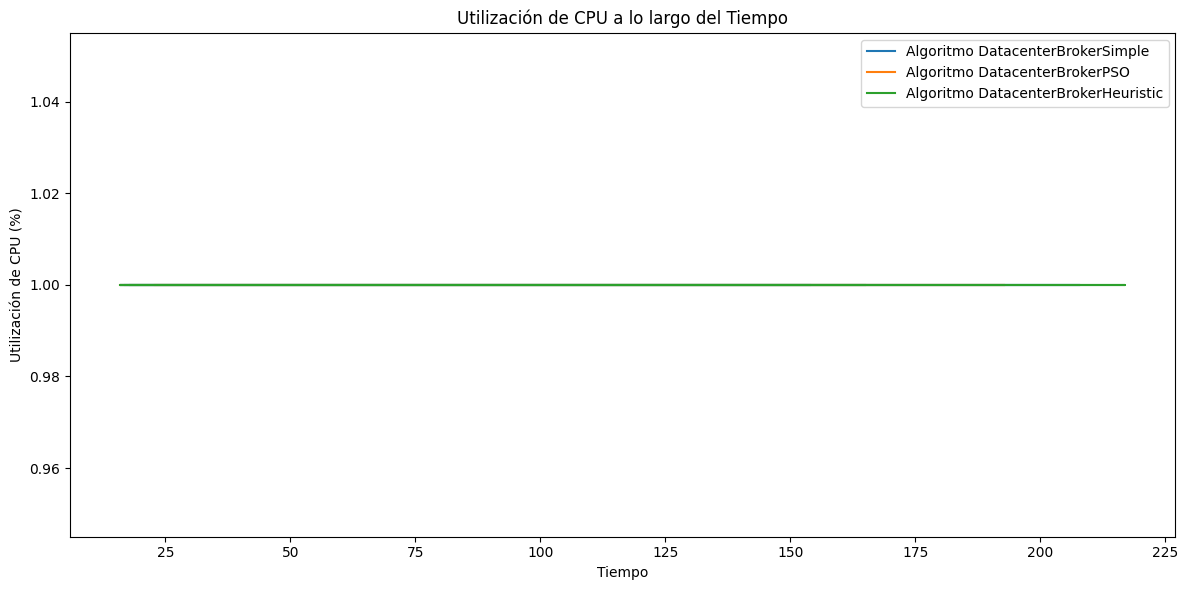

In [40]:
# Si tienes múltiples algoritmos
algorithms = current_case['Broker'].unique()

plt.figure(figsize=(12, 6))

for algo in algorithms:
    df_algo = current_case[current_case['Broker'] == algo]
    plt.plot(df_algo['duration'], df_algo['CPU Utilization Start'], label=f'Algoritmo {algo}')

plt.xlabel('Tiempo')
plt.ylabel('Utilización de CPU (%)')
plt.title('Utilización de CPU a lo largo del Tiempo')
plt.legend()
plt.tight_layout()
plt.show()

In [41]:
current_case_vms

,Broker,vm,vm_load,duration
0,DatacenterBrokerSimple,0,0.07,2426
1,DatacenterBrokerSimple,1,0.07,2426
2,DatacenterBrokerSimple,2,0.07,2426
3,DatacenterBrokerSimple,3,0.07,2426
4,DatacenterBrokerSimple,4,0.07,2426
5,DatacenterBrokerSimple,5,0.07,2426
6,DatacenterBrokerSimple,6,0.07,2426
7,DatacenterBrokerSimple,7,0.07,2426
8,DatacenterBrokerSimple,8,0.07,2426
9,DatacenterBrokerSimple,9,0.07,2426


In [42]:
current_case

,Broker,task,vm,duration,start_time,finish_time,CPU Utilization Start,CPU Utilization Finish
0,DatacenterBrokerSimple,7,7,17,0,17,1,1
1,DatacenterBrokerSimple,10,10,18,0,18,1,1
2,DatacenterBrokerSimple,8,8,20,0,20,1,1
3,DatacenterBrokerSimple,12,12,21,0,21,1,1
4,DatacenterBrokerSimple,0,0,22,0,22,1,1
...,...,...,...,...,...,...,...,...
595,DatacenterBrokerHeuristic,165,2,168,3290,3458,1,1
596,DatacenterBrokerHeuristic,179,2,210,3458,3668,1,1
597,DatacenterBrokerHeuristic,187,2,191,3668,3859,1,1
598,DatacenterBrokerHeuristic,190,2,208,3859,4066,1,1


In [43]:
# Cargar y pivotear los datos
df_pivot = current_case_vms.pivot(index='Broker', columns='vm', values='vm_load').fillna(0)

task_counts = current_case.groupby(['Broker', 'vm']).size()
vm_color = 'blue'

# Crear el gráfico
fig = go.Figure()

for vm in df_pivot.columns:
    hover_data = []
    for broker in df_pivot.index:
        task_count = int(task_counts[broker][vm])
        task_count = task_count if task_count >= 0 else 0
        hover_data.append(f'VM {vm} (Tareas: {task_count})')
    fig.add_trace(go.Bar(
        x=df_pivot.index,
        y=df_pivot[vm],
        name=f'VM {vm}',
        hovertext=hover_data,
    ))

fig.update_layout(
    barmode='stack',
    xaxis_title='Algoritmo',
    yaxis_title='Utilización de CPU (%)',
    title='Utilización de CPU por VM por cada algoritmo'
)
fig.show()